<a href="https://colab.research.google.com/github/rvp3011/Lab0/blob/main/Titanic_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [4]:
passengers_df = df_titanic[(df_titanic['class'] == '1st') | (df_titanic['class'] == '2nd') | (df_titanic['class'] == '3rd')]
joint_distribution = pd.crosstab(passengers_df['class'], passengers_df['embarked'])
joint_distribution

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [6]:
conditional_distribution1 = pd.crosstab(passengers_df['class'], passengers_df['embarked'], normalize='columns')
conditional_distribution1

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [7]:
conditional_distribution2 = pd.crosstab(passengers_df['embarked'], passengers_df['class'], normalize='columns')
conditional_distribution2

class,1st,2nd,3rd
embarked,,,
B,0.009259,0.021127,0.000000
C,0.441358,0.091549,0.143865
Q,0.009259,0.024648,0.159379
S,0.540123,0.862676,0.696756


In [12]:
prop_1 = conditional_distribution2.loc['S', '3rd']
print(f"Proportion1: {prop_1:.2f}")

prop_2 = conditional_distribution1.loc['3rd', 'S']
print(f"Proportion2: {prop_2:.2f}")

Proportion1: 0.70
Proportion2: 0.54


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

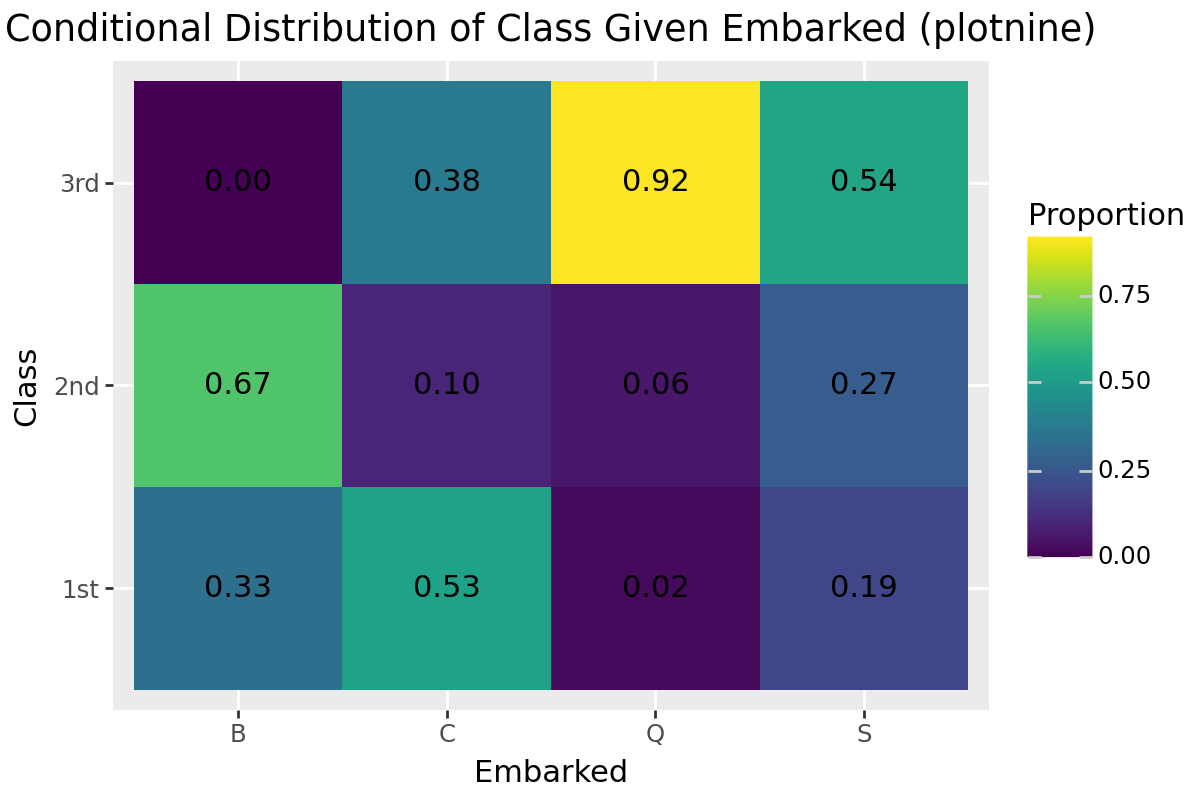

In [19]:
from plotnine import ggplot, aes, geom_tile, geom_text, labs, theme

conditional_distribution_long = conditional_distribution1.stack().reset_index(name='proportion')
conditional_distribution_long.columns = ['class', 'embarked', 'proportion']
heatmap_plotnine = (
    ggplot(conditional_distribution_long, aes(x='embarked', y='class', fill='proportion')) +
    geom_tile() +
    geom_text(aes(label='proportion'), format_string='{:.2f}') +
    labs(title='Conditional Distribution of Class Given Embarked (plotnine)',
         x='Embarked',
         y='Class',
         fill='Proportion') +
    theme(figure_size=(6, 4))
)

heatmap_plotnine